# Overview

## Main Purpose

We would like to build a model to predict whether one is going to be defaulted on loan. 

In other words, we will build a model to automatically approve/disapprove one's loan request.

## About the data set

- The data is taken from Kaggle.com
- About 6000 entries with 13 features
    - loan: amount of loan
    - mortdue: amount of mortgage
    - value: value of property (house)
    - reason: reason for loan
    - job: one's profession
    - yoj: duration of employment
    - **derog: number of bad/negative report**
    - **delinq: number of delinquent credit line**
    - clage: number of months of the oldest credit lines
    - ninq: number of recent credit lines
    - clno: total number of credit lines
    - debtnc: debt to income ratio
    
- Many missing values on important features
- imbalanced


## Key Takeaway

Some of features have a lot of missing values. 

The questions are whether we should drop them or fill them up. 

**DEROG** and **DELINQ** having many missing values, yet seem very important to decision making. 

If you were a banker, you would of course want to know your client's credit history. 

**We are going to build another (sub)model to predict and fill up the missing values of these features.**

## Steps

1. Information and description of the data
2. **Handle the missing values** 
3. Undersampling -- accounting for imbalanced dependent varaible
4. Dropping variables  
    - correlation
    - feautre selection -- which would work the best? why and why not others?
    - feature extraction (?) -- would PCA be needed? why and why not? 
5. Modeling
6. Evaluation
7. Conclusion

## Conclusion

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('hmeq.csv')

In [3]:
df

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5955,0,88900,57264.0,90185.0,DebtCon,Other,16.0,0.0,0.0,221.808718,0.0,16.0,36.112347
5956,0,89000,54576.0,92937.0,DebtCon,Other,16.0,0.0,0.0,208.692070,0.0,15.0,35.859971
5957,0,89200,54045.0,92924.0,DebtCon,Other,15.0,0.0,0.0,212.279697,0.0,15.0,35.556590
5958,0,89800,50370.0,91861.0,DebtCon,Other,14.0,0.0,0.0,213.892709,0.0,16.0,34.340882


### Information of the data set

- 2 categorical features and 11 numerical features
- Missing values

**NOTE** 'BAD' feature is the dependent variable. 

It should be the categorical though its type is shown as integer.

In [5]:
df.info()
# sns.displot(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BAD      5960 non-null   int64  
 1   LOAN     5960 non-null   int64  
 2   MORTDUE  5442 non-null   float64
 3   VALUE    5848 non-null   float64
 4   REASON   5708 non-null   object 
 5   JOB      5681 non-null   object 
 6   YOJ      5445 non-null   float64
 7   DEROG    5252 non-null   float64
 8   DELINQ   5380 non-null   float64
 9   CLAGE    5652 non-null   float64
 10  NINQ     5450 non-null   float64
 11  CLNO     5738 non-null   float64
 12  DEBTINC  4693 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 605.4+ KB


### Descrition of the data set

Almost all numerical features are skewed to right. 

In other words, their values at 75% percentile and Max have a huge gap.

Better look in distribution plot

In [9]:
df.describe()

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
count,5960.000000,5960.000000,5442.000000,5848.000000,5445.000000,5252.000000,5380.000000,5652.000000,5450.000000,5738.000000,4693.000000
mean,0.199497,18607.969799,73760.817200,101776.048741,8.922268,0.254570,0.449442,179.766275,1.186055,21.296096,33.779915
std,0.399656,11207.480417,44457.609458,57385.775334,7.573982,0.846047,1.127266,85.810092,1.728675,10.138933,8.601746
min,0.000000,1100.000000,2063.000000,8000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.524499
25%,0.000000,11100.000000,46276.000000,66075.500000,3.000000,0.000000,0.000000,115.116702,0.000000,15.000000,29.140031
50%,0.000000,16300.000000,65019.000000,89235.500000,7.000000,0.000000,0.000000,173.466667,1.000000,20.000000,34.818262
75%,0.000000,23300.000000,91488.000000,119824.250000,13.000000,0.000000,0.000000,231.562278,2.000000,26.000000,39.003141
max,1.000000,89900.000000,399550.000000,855909.000000,41.000000,10.000000,15.000000,1168.233561,17.000000,71.000000,203.312149


TypeError: displot() got multiple values for argument 'data'

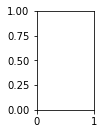

In [50]:

fig, axes = plt.subplots(2, 5, sharex=True, figsize=(16,8))
# # # sns.displot(df['LOAN'], ax=axes[0], kind = 'kde').set(title="adsf")
# plt.subplot(2,5,1)
sns.hisplot(x = df['LOAN'],ax = axes[0,0])
sns.histplot(x=X_train['Age'], hue=y_train, ax=ax1)

# sns.displot(df['MORTDUE'],kind = 'kde')
# sns.displot(data = df, x ='VALUE',ax=axes[0,0],kind = 'kde')


In [8]:
df.isna().sum()

BAD           0
LOAN          0
MORTDUE     518
VALUE       112
REASON      252
JOB         279
YOJ         515
DEROG       708
DELINQ      580
CLAGE       308
NINQ        510
CLNO        222
DEBTINC    1267
dtype: int64